In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
def grab_cols(df):
    num_cols = [col for col in df.columns if np.issubdtype(df[col],np.number)]
    cat_cols = [col for col in df.columns if col not in num_cols]
    num_but_cat = [col for col in num_cols if df[col].nunique()<10]
    cat_but_car = [col for col in cat_cols if df[col].nunique() >20]
    cat_cols = cat_cols + num_but_cat 
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"cat_cols = {len(cat_cols)}")
    print(f"num_cols = {len(num_cols)}")
    print(f"num_but_cat = {len(num_but_cat)}")
    print(f"cat_but_car= {len(cat_but_car)}")
    return cat_cols,num_cols,cat_but_car,num_but_cat

cat_cols,num_cols,cat_but_car,num_but_cat = grab_cols(df)

cat_cols = 1
num_cols = 8
num_but_cat = 1
cat_but_car= 0


In [19]:
def outliers(df,variable):
    q1= df[variable].quantile(0.05)
    q3 = df[variable].quantile(0.95)
    iqr = q3 - q1
    lower_lim = q1 - 1.5*iqr
    upper_lim = q3 + 1.5*iqr
    return lower_lim,upper_lim

def check_outliers(df,variable):
    lower_lim,upper_lim = outliers(df,variable)
    if df.loc[(df[variable]<lower_lim) | (df[variable]>upper_lim)].any(axis=None):
        return True
    else:
        return False
    
for col in df.columns:
    print(col,check_outliers(df,col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


In [20]:
def grab_outliers(df,variable,index=False):
    lower_lim,upper_lim =outliers(df,variable)
    if df.loc[(df[variable]<lower_lim) | (df[variable]>upper_lim)].shape[0]>10:
        print(df.loc[(df[variable]<lower_lim) | (df[variable]>upper_lim)].head())
    else:
        print(df.loc[(df[variable]<lower_lim) | (df[variable]>upper_lim)])
    if index:
        outlier_index = list(df.loc[(df[variable]<lower_lim) | (df[variable]>upper_lim)].index)
            
        return outlier_index
    
grab_outliers(df,"Insulin",index=False)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
13             1      189             60             23      846  30.1   
228            4      197             70             39      744  36.7   

     DiabetesPedigreeFunction  Age  Outcome  
13                      0.398   59        1  
228                     2.329   31        0  


In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [23]:
def num_vs_target(df,num_cols,target):
    for col in num_cols:
        print(col)
        print(df.groupby(target)[col].mean())
        print()
        
num_vs_target(df,num_cols,"Outcome")

Pregnancies
Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64

Glucose
Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64

BloodPressure
Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64

SkinThickness
Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64

Insulin
Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64

BMI
Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64

DiabetesPedigreeFunction
Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64

Age
Outcome
0    31.190000
1    37.067164
Name: Age, dtype: float64



<Axes: >

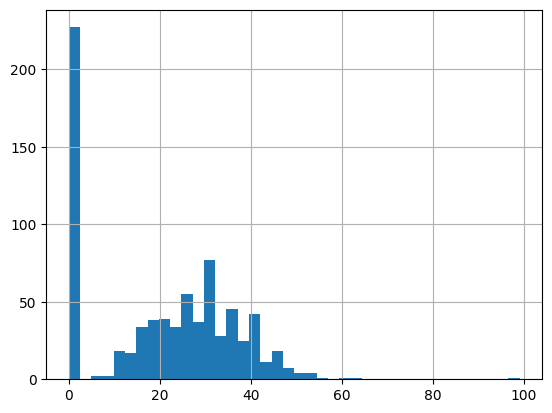

In [24]:
df["SkinThickness"].hist(bins=40)

<Axes: >

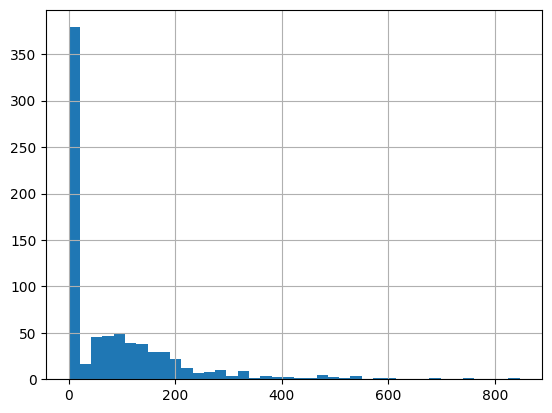

In [26]:
df["Insulin"].hist(bins=40)

In [27]:
df["Glucose"] =df["Glucose"].replace(0,np.nan)
df["BloodPressure"] = df["BloodPressure"].replace(0,np.nan)
df["SkinThickness"] = df["SkinThickness"].replace(0,np.nan)
df["Insulin"] = df["Insulin"].replace(0,np.nan)
df["BMI"] = df["BMI"].replace(0,np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

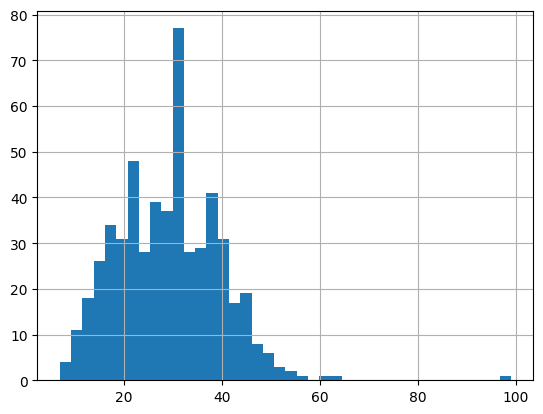

In [28]:
df["SkinThickness"].hist(bins=40) 

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
imp= IterativeImputer(
    estimator=XGBRegressor(n_estimators=300,max_depth=7),
    max_iter=30,
    random_state=0
).set_output(transform="pandas")

df2=imp.fit_transform(df)

c:\Users\oskar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: ylabel='Density'>

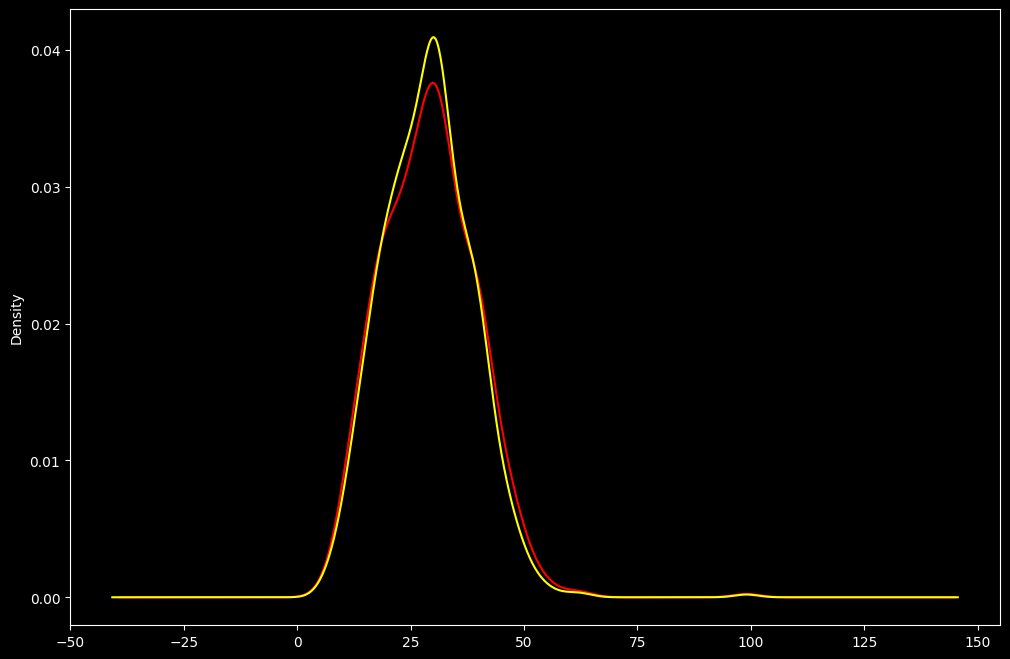

In [31]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

df["SkinThickness"].plot(kind="kde",ax=ax,color="red")
df2["SkinThickness"].plot(kind="kde",ax=ax,color="yellow")

In [33]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [126]:
X = df2.drop("Outcome",axis=1)
y = df2["Outcome"]
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf= RandomForestClassifier(n_estimators=300,max_depth=6)
cross_val_score(rf,X,y,cv=10,n_jobs=-1,scoring="roc_auc").mean()

0.8425014245014244

In [134]:
cross_val_score(rf,X,y,cv=10,n_jobs=-1,scoring="roc_auc").mean()

0.8410170940170939

In [128]:
cross_val_score(rf,X,y,cv=10,n_jobs=-1,scoring="accuracy").mean()

0.7630211893369788

In [37]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,226.054779,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,75.816528,26.6,0.351,31.0
2,8.0,183.0,64.0,19.361162,174.033600,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0
764,2.0,122.0,70.0,27.000000,147.801620,36.8,0.340,27.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0
766,1.0,126.0,60.0,24.495855,108.591232,30.1,0.349,47.0


In [116]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias=False).set_output(transform="pandas")
X2=poly.fit_transform(X)

In [106]:
cross_val_score(rf,X2,y,cv=10,n_jobs=-1,scoring="roc_auc").mean()

0.8436866096866098

In [108]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_estimators=100,max_depth=6)

In [109]:
cross_val_score(xg,X2,y,cv=10,n_jobs=-1,scoring="roc_auc").mean()

0.8165071225071225

In [104]:
X2["Insulin_to_Glucose"] = X2["Insulin"] / X2["Glucose"]
X2["Glucose_to_Age"] = X2["Glucose"] / X2["Age"]

In [75]:
cross_val_score(xg,X2,y,cv=10,n_jobs=-1,scoring="roc_auc").mean()

0.8122820512820514

In [110]:
X2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies^2',
       'Pregnancies Glucose', 'Pregnancies BloodPressure',
       'Pregnancies SkinThickness', 'Pregnancies Insulin', 'Pregnancies BMI',
       'Pregnancies DiabetesPedigreeFunction', 'Pregnancies Age', 'Glucose^2',
       'Glucose BloodPressure', 'Glucose SkinThickness', 'Glucose Insulin',
       'Glucose BMI', 'Glucose DiabetesPedigreeFunction', 'Glucose Age',
       'BloodPressure^2', 'BloodPressure SkinThickness',
       'BloodPressure Insulin', 'BloodPressure BMI',
       'BloodPressure DiabetesPedigreeFunction', 'BloodPressure Age',
       'SkinThickness^2', 'SkinThickness Insulin', 'SkinThickness BMI',
       'SkinThickness DiabetesPedigreeFunction', 'SkinThickness Age',
       'Insulin^2', 'Insulin BMI', 'Insulin DiabetesPedigreeFunction',
       'Insulin Age', 'BMI^2', 'BMI DiabetesPedigreeFunction', 'BMI Age',
       'DiabetesPedigree

In [117]:
references = ["Glucose",]

creator = RelativeFeatures(
    variables=["Pregnancies","BloodPressure","SkinThickness","Insulin","BMI","Age","DiabetesPedigreeFunction"],
    reference=references,
    func=["div"]
)
X2=creator.fit_transform(X2)

In [118]:
references = ["Insulin"]

creator = RelativeFeatures(
    variables=["Pregnancies","BloodPressure","SkinThickness","Glucose","BMI","Age","DiabetesPedigreeFunction"],
    reference=references,
    func=["div"]
)
X2=creator.fit_transform(X2)

In [119]:
references = ["BloodPressure"]

creator = RelativeFeatures(
    variables=["Pregnancies","Insulin","SkinThickness","Glucose","BMI","Age","DiabetesPedigreeFunction"],
    reference=references,
    func=["div"]
)
X2=creator.fit_transform(X2)

In [120]:
references = ["SkinThickness"]

creator = RelativeFeatures(
    variables=["Pregnancies","Insulin","BloodPressure","Glucose","BMI","Age","DiabetesPedigreeFunction"],
    reference=references,
    func=["div"]
)
X2=creator.fit_transform(X2)

In [121]:
references = ["BMI"]

creator = RelativeFeatures(
    variables=["Pregnancies","Insulin","BloodPressure","Glucose","SkinThickness","Age","DiabetesPedigreeFunction"],
    reference=references,
    func=["div"]
)
X2=creator.fit_transform(X2)

In [122]:
references = ["Age"]

creator = RelativeFeatures(
    variables=["Pregnancies","Insulin","BloodPressure","Glucose","SkinThickness","BMI","DiabetesPedigreeFunction"],
    reference=references,
    func=["div"]
)
X2=creator.fit_transform(X2)

In [123]:
cross_val_score(xg,X2,y,cv=10,n_jobs=-1,scoring="accuracy").mean()

0.7369446343130555

In [125]:
cross_val_score(rf,X2,y,cv=10,n_jobs=-1,scoring="accuracy").mean()

0.7642515379357485

In [130]:
cross_val_score(rf,X2,y,cv=10,n_jobs=-1,scoring="roc_auc").mean()

0.8472535612535612